# Portfolio Overview July 2020

In [77]:
from selenium import webdriver
import time
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from webdriver_manager.chrome import ChromeDriverManager
import sys
sys.path.append("..") # includes parent directory

import config
nordnetBrukerNavn = config.nordnetBrukerNavn
nordnetPassord = config.nordnetPassord



In [7]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
browser = webdriver.Chrome(ChromeDriverManager().install(),options=chrome_options)


[WDM] - Current google-chrome version is 80.0.3987
[WDM] - Get LATEST driver version for 80.0.3987
[WDM] - Driver [C:\Users\larsshe\.wdm\drivers\chromedriver\win32\80.0.3987.106\chromedriver.exe] found in cache


Page title was 'Login - Nordnet'


In [8]:
browser.get(
"https://classic.nordnet.no/mux/login/startNO.html?clearEndpoint=0&intent=next")
print("Page title was '{}'".format(browser.title))
time.sleep(5)

switchToPasLogIn = browser.find_elements_by_xpath(
    '//button[starts-with(., "brukernavn og passord")]')[0].click()
time.sleep(2)

# Inserting values:
logOnName = browser.find_elements_by_xpath(
    '//input')[0].send_keys(nordnetBrukerNavn)
password = browser.find_elements_by_xpath('//input')[1].send_keys(nordnetPassord)

switchToPasLogIn = browser.find_elements_by_xpath(
    '//button[starts-with(., "Logg inn")]')[0].click()
time.sleep(10)
print("Page title was '{}'".format(browser.title))


Page title was 'Login - Nordnet'
Page title was 'Økonomisk oversikt - Nordnet'


In [9]:
browser.get('https://www.nordnet.no/overview/details/3')
print("Page title was '{}'".format(browser.title))


Page title was 'Kontooversikt - Nordnet'


In [32]:
tableRows = browser.find_elements_by_xpath('//tr') # Find all rows
stocks = []
values = []
for row in tableRows:
        tempData = row.text.split('\n')
        if len(tempData) >= 3:
            ticker, prct, value = tempData
            stocks.append(ticker)
            values.append(float(value.replace(" ", "")))


In [40]:
browser.quit()

In [42]:
from datetime import datetime # Current date time in local system 


2020-07-29


In [52]:
df_temp = pd.DataFrame()
df_temp['stock'] = stocks
df_temp['value'] = values
current_date = datetime.date(datetime.now())
df_temp['date'] = current_date

df_temp.head()

,stock,value,date
0,SGOL,10289.0,2020-07-29
1,FMX,11185.0,2020-07-29
2,IEV,28421.0,2020-07-29
3,MGM,8426.0,2020-07-29
4,GXC,36280.0,2020-07-29


In [64]:
with open('./../data/portfolioReport.csv', 'a') as f:
    df_temp.to_csv(f, header=False, index = False)
    
df = pd.read_csv('./../data/portfolioReport.csv', header=None)
df.columns = ['stock', 'value', 'date']

In [65]:
df.head()

,stock,value,date
0,SGOL,10289.0,2020-07-29
1,FMX,11185.0,2020-07-29
2,IEV,28421.0,2020-07-29
3,MGM,8426.0,2020-07-29
4,GXC,36280.0,2020-07-29


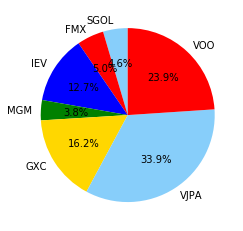

In [79]:
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
plt.pie(df.value, labels= df['stock'], colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

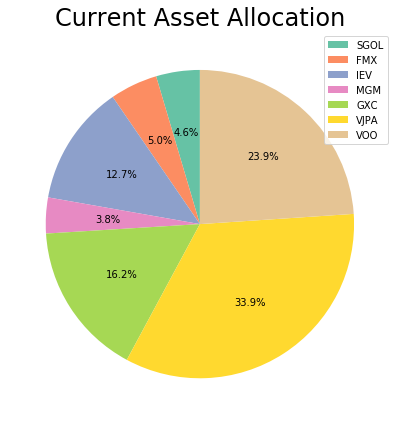

In [95]:
import matplotlib.pylab as pl
from matplotlib import cm

labels = df['stock']
n = len(labels)
cs=cm.Set2(np.arange(n)/n)
#explode =(0,0.1,0,0.1,0) 
fig, ax1 = plt.subplots(figsize = (24,6)) 
ax1.pie(df.value, colors=cs, startangle=90, autopct='%.1f%%', shadow = False) 
plt.title('Current Asset Allocation', fontsize = 24) 
ax1.legend(labels, loc = 'upper right') 
plt.tight_layout() 
plt.show()